In [1]:
# Name : Dimpal Lad
# CWID : 20023001
# Assignment No : 03
# Assignment Name : HW03_knn

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# Loading breast-cancer-wisconsin
df = pd.read_csv('C:/Users/dimpa/OneDrive - stevens.edu/CS-513/HW_02_EDA/breast-cancer-wisconsin.csv')
df.head(20)

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [5]:
df['F6'] = pd.to_numeric(df['F6'], errors='coerce') #Converting the value
df['F6'].fillna(df['F6'].mean(),inplace=True)
df = df.dropna() # drops NaN values 
print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists

# Splitting the dataset
attr = df.drop(columns = ['Class'])  # features
target = df['Class']  # target variable
attr.head()

Empty DataFrame
Columns: [Sample, F1, F2, F3, F4, F5, F6, F7, F8, F9, Class]
Index: []


,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,1000025,5,1,1,1,2,1.0,3,1,1
1,1002945,5,4,4,5,7,10.0,3,2,1
2,1015425,3,1,1,1,2,2.0,3,1,1
3,1016277,6,8,8,1,3,4.0,3,7,1
4,1017023,4,1,1,3,2,1.0,3,1,1


In [6]:
target.head() 

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [7]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,0.070067,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.070285,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.071217,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.071281,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.071336,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0


In [8]:
attr_train, attr_test, target_train,target_test  = train_test_split(attr, target,test_size = 0.3, random_state = 4, shuffle = True)
target_train.head()
target_test.head()

236    4
463    2
72     2
288    4
178    2
Name: Class, dtype: int64

In [9]:
from sklearn.metrics import accuracy_score
k_values = [3, 5, 10]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(attr_train, target_train)
    target_pred = knn.predict(attr_test)
    accuracy = accuracy_score(target_test,target_pred ) 
    print(f'Accuracy of model with k = {k}: {accuracy}%')
    print('')

Accuracy of model with k = 3: 0.9761904761904762%

Accuracy of model with k = 5: 0.9761904761904762%

Accuracy of model with k = 10: 0.9714285714285714%



In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(target_test, target_pred)

print('Confusion Matrix')
print(confusion_matrix(target_test, target_pred))
print()
print('Accuracy score')
print(accuracy_score(target_test, target_pred))
print()
print('Classification Report')
print(classification_report(target_test, target_pred))

Confusion Matrix
[[136   2]
 [  4  68]]

Accuracy score
0.9714285714285714

Classification Report
              precision    recall  f1-score   support

           2       0.97      0.99      0.98       138
           4       0.97      0.94      0.96        72

    accuracy                           0.97       210
   macro avg       0.97      0.96      0.97       210
weighted avg       0.97      0.97      0.97       210



In [11]:
# target_pred.head()
attr_test['target_pred']=target_pred
# print(target_test)
attr_test['target_actual']= target_test
attr_test.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,target_pred,target_actual
236,0.088102,1.000000,0.777778,0.777778,0.111111,0.777778,1.000000,0.333333,0.777778,1.0,4,4
463,0.090992,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.111111,0.0,2,2
72,0.079373,0.000000,0.222222,0.222222,0.111111,0.111111,0.000000,0.666667,0.111111,0.0,2,2
288,0.035984,0.555556,0.000000,0.222222,0.000000,0.333333,0.444444,0.444444,1.000000,0.0,2,4
178,0.085158,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0,2,2


[Text(0, 0.5, '2'), Text(0, 1.5, '4')]

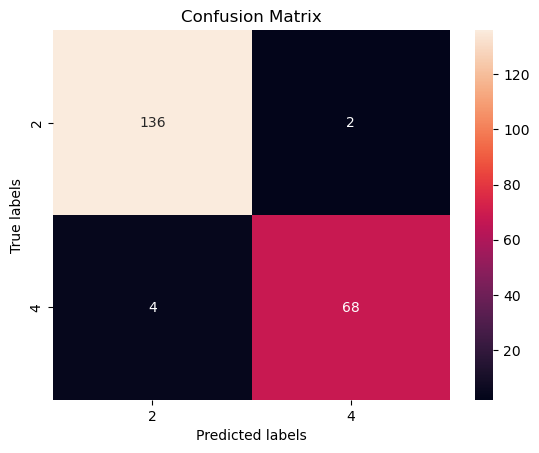

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['2', '4'])
ax.yaxis.set_ticklabels(['2','4'])